<a href="https://colab.research.google.com/github/anton-gavrilin/machine_learning_labs/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing import sequence

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255, test_images / 255

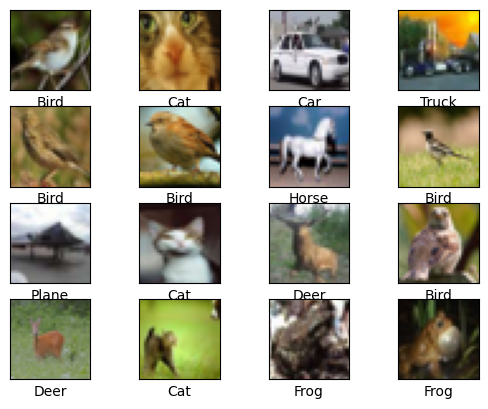

In [ ]:
import random
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

random_nums = [random.randint(0, 50000) for _ in range(16)]

for random, i in zip(random_nums, range(16)):
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[random], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[random][0]])
plt.show()

In [ ]:
train_images = train_images[:5000]
train_labels = train_labels[:5000]

test_images = test_images[:2000]
test_labels = test_labels[:2000]

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
157/157 [==============================] - 8s 45ms/step - loss: 2.0642 - accuracy: 0.2134
Epoch 2/10
157/157 [==============================] - 8s 48ms/step - loss: 1.7218 - accuracy: 0.3624
Epoch 3/10
157/157 [==============================] - 8s 51ms/step - loss: 1.5609 - accuracy: 0.4362
Epoch 4/10
157/157 [==============================] - 6s 41ms/step - loss: 1.4493 - accuracy: 0.4712
Epoch 5/10
157/157 [==============================] - 8s 50ms/step - loss: 1.3215 - accuracy: 0.5228
Epoch 6/10
157/157 [==============================] - 6s 41ms/step - loss: 1.2463 - accuracy: 0.5510
Epoch 7/10
157/157 [==============================] - 8s 50ms/step - loss: 1.1892 - accuracy: 0.5780
Epoch 8/10
157/157 [==============================] - 7s 42ms/step - loss: 1.1034 - accuracy: 0.6108
Epoch 9/10
157/157 [==============================] - 9s 60ms/step - loss: 1.0332 - accuracy: 0.6344
Epoch 10/10
157/157 [==============================] - 12s 78ms/step - loss: 0.9540 - accur

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Loss: {loss}, Accuracy: {accuracy}")

63/63 [==============================] - 2s 22ms/step - loss: 1.2791 - accuracy: 0.5550
Loss: 1.2790566682815552, Accuracy: 0.5550000071525574


In [ ]:
# Image resizer
from PIL import Image
import os

directory = 'random_images'
new_dir = 'new_images'

target_size = (32, 32)

for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):

        img = Image.open(os.path.join(directory, filename))

        img_resized = img.resize(target_size)

        img_resized.save(os.path.join(new_dir, filename))

1/1 [==============================] - 0s 21ms/step
Truly is cat2.jpg
Prediction is Bird
----------------------


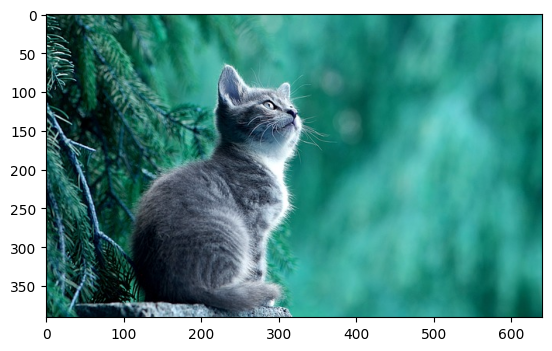

1/1 [==============================] - 0s 20ms/step
Truly is dog3.jpg
Prediction is Deer
----------------------


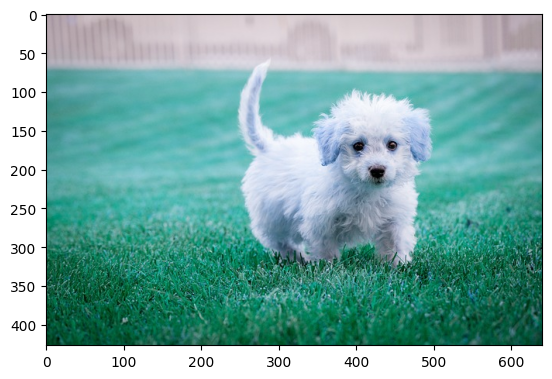

1/1 [==============================] - 0s 29ms/step
Truly is car1.jpg
Prediction is Deer
----------------------


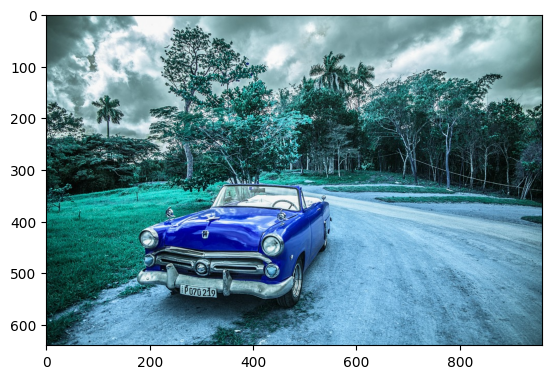

1/1 [==============================] - 0s 33ms/step
Truly is car2.jpg
Prediction is Car
----------------------


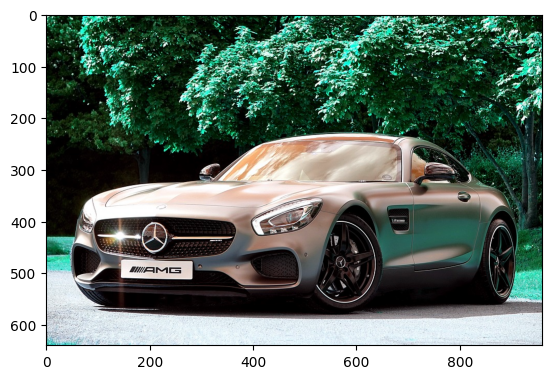

1/1 [==============================] - 0s 42ms/step
Truly is truck2.jpg
Prediction is Plane
----------------------


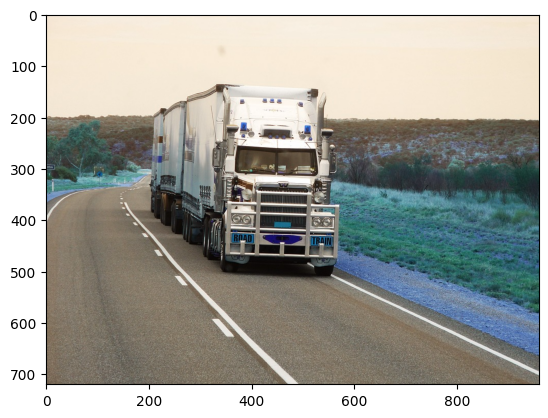

1/1 [==============================] - 0s 20ms/step
Truly is horse2.jpg
Prediction is Horse
----------------------


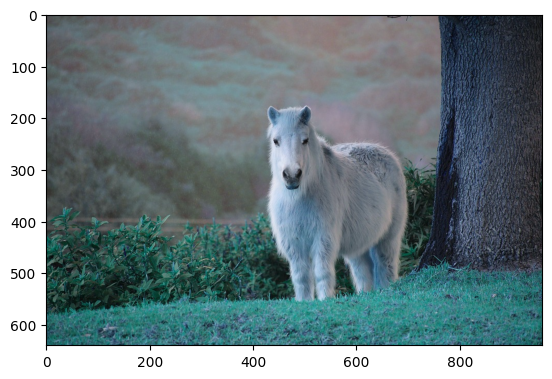

1/1 [==============================] - 0s 36ms/step
Truly is truck1.jpg
Prediction is Truck
----------------------


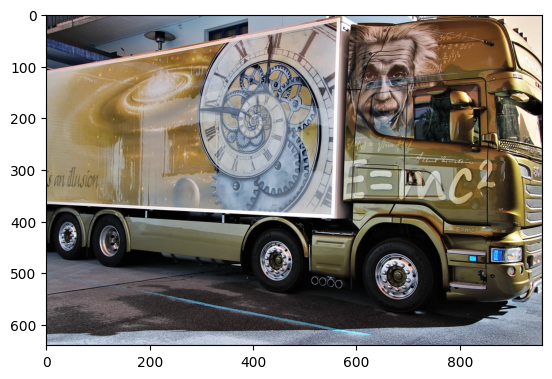

1/1 [==============================] - 0s 30ms/step
Truly is cat1.jpg
Prediction is Horse
----------------------


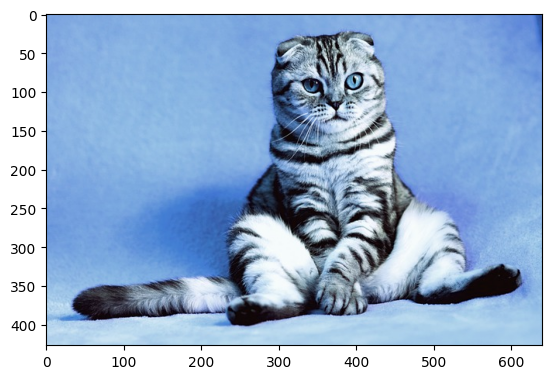

1/1 [==============================] - 0s 20ms/step
Truly is bird1.jpg
Prediction is Deer
----------------------


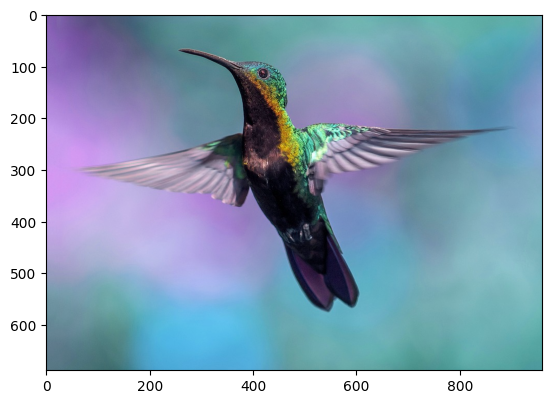

1/1 [==============================] - 0s 42ms/step
Truly is frog2.jpg
Prediction is Frog
----------------------


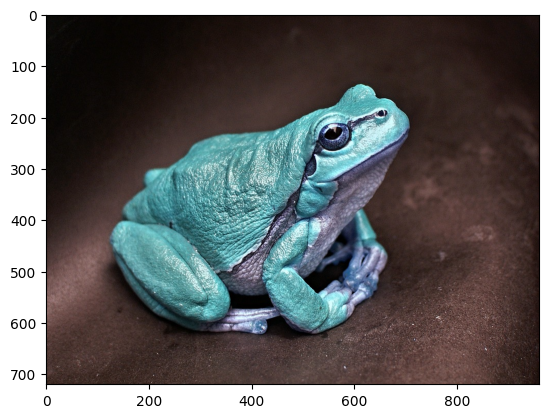

1/1 [==============================] - 0s 39ms/step
Truly is ship1.jpg
Prediction is Ship
----------------------


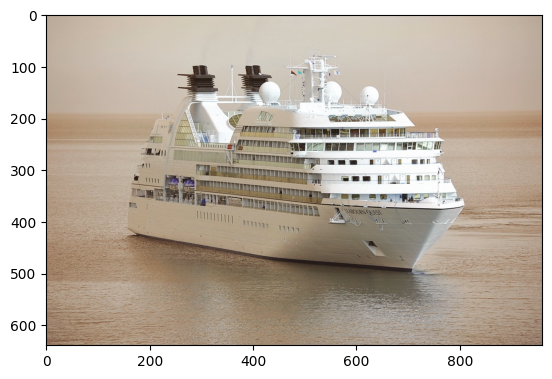

1/1 [==============================] - 0s 41ms/step
Truly is deer1.jpg
Prediction is Deer
----------------------


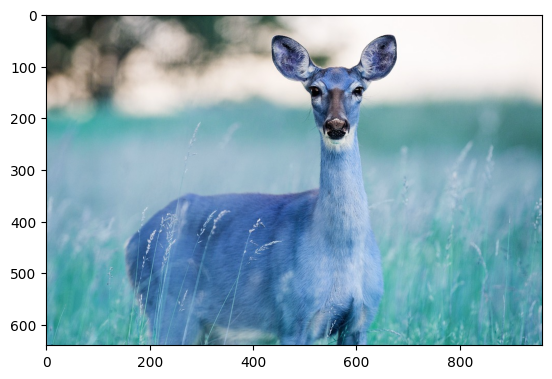

1/1 [==============================] - 0s 30ms/step
Truly is frog1.jpg
Prediction is Frog
----------------------


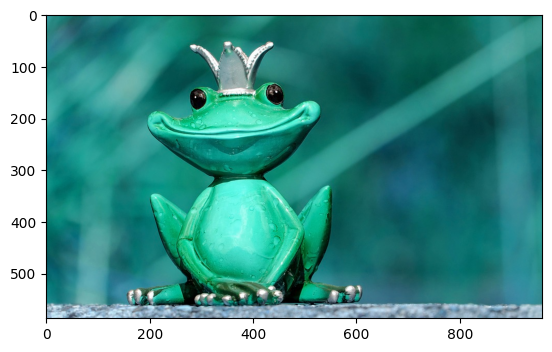

1/1 [==============================] - 0s 39ms/step
Truly is bird2.jpg
Prediction is Deer
----------------------


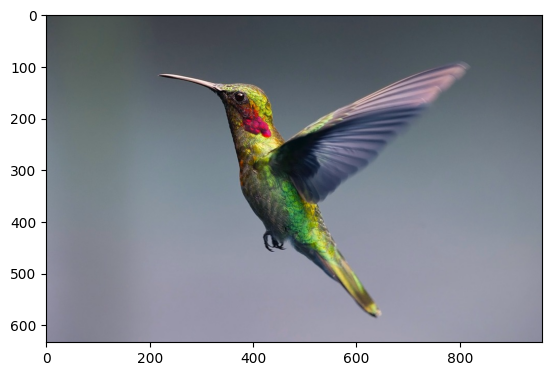

1/1 [==============================] - 0s 32ms/step
Truly is plane1.jpg
Prediction is Ship
----------------------


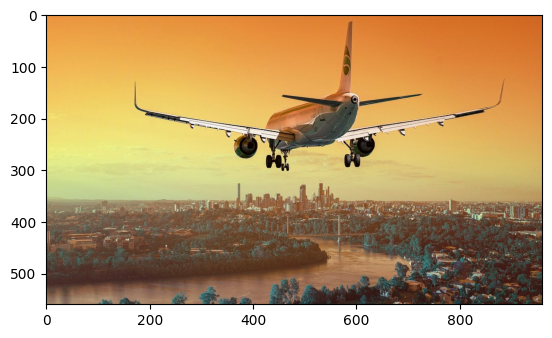

1/1 [==============================] - 0s 29ms/step
Truly is deer2.jpg
Prediction is Cat
----------------------


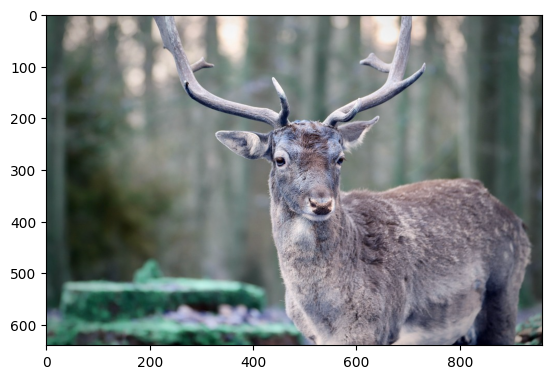

1/1 [==============================] - 0s 29ms/step
Truly is dog2.jpg
Prediction is Dog
----------------------


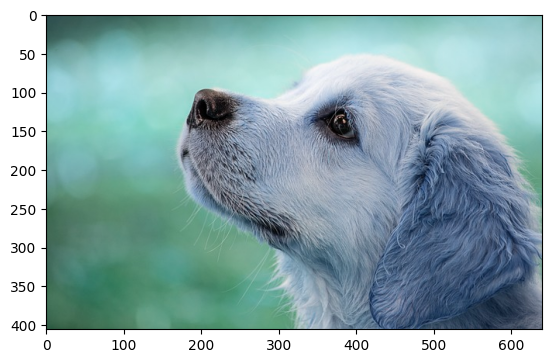

1/1 [==============================] - 0s 29ms/step
Truly is horse1.jpg
Prediction is Horse
----------------------


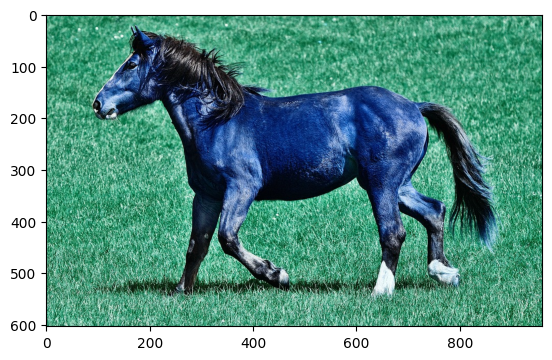

In [ ]:
import cv2 as cv

for filename in os.listdir(new_dir):
  if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
    img = cv.imread(f"{new_dir}/{filename}")
    plot_img = cv.imread(f"{directory}/{filename}")

    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)

    plt.imshow(plot_img, cmap=plt.cm.binary)

    prediction = model.predict(np.array([img]) / 255)

    index = np.argmax(prediction)
    
    print(f"Truly is {filename}")
    print(f"Prediction is {class_names[index]}")
    print("----------------------")
    plt.show()